In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
!unzip -q drive/MyDrive/___Work/data_dec_1.zip

In [ ]:
columns = ['Year', 'Month', 'Record', 'Latitude', 'Longitude', 'Value']
dtype = {'Year': int, 'Month':int, 'Record':int,
         'Lattitude': float, 'Longitude':float, 'Value': float}

wind_n = pd.read_csv('reg01_nth_d_avg.csv', delimiter=';', dtype=dtype)
wind_w = pd.read_csv('reg01_wst_d_avg.csv', delimiter=';',
                     on_bad_lines='skip')
tp_sum = pd.read_csv('reg01_tps_d_sum.csv', delimiter=';',
                     on_bad_lines='skip', encoding='unicode_escape')
tn_sum = pd.read_csv('reg01_tng_d_sum.csv', delimiter=';')
tp_sum_d = pd.read_csv('reg01_tps_d_sum_dly.csv', delimiter=';')
tn_sum_d = pd.read_csv('reg01_tng_d_sum_dly.csv', delimiter=';',
                       on_bad_lines='skip', encoding='unicode_escape')

# Wind N

In [ ]:
wind_n.describe()

,Year,Month,Record,Latitude,Longitude,Value,Count
count,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000
mean,1999.500,6.500,2.000,52.500,144.500,-258.361,145.940
std,12.121,3.452,0.816,1.514,0.935,2868.945,63.650
min,1979.000,1.000,1.000,50.000,143.000,-32767.000,0.000
25%,1989.000,3.750,1.000,51.250,143.750,-6.838,98.000
50%,1999.500,6.500,2.000,52.500,144.500,-5.043,150.000
75%,2010.000,9.250,3.000,53.750,145.250,-3.320,199.000
max,2020.000,12.000,3.000,55.000,146.000,-0.001,240.000


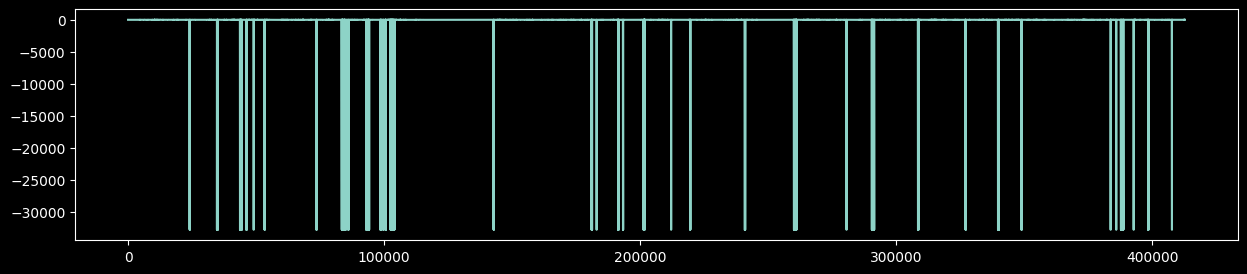

In [ ]:
plt.style.use('dark_background')
wind_n.Value.plot(figsize=(15, 3));

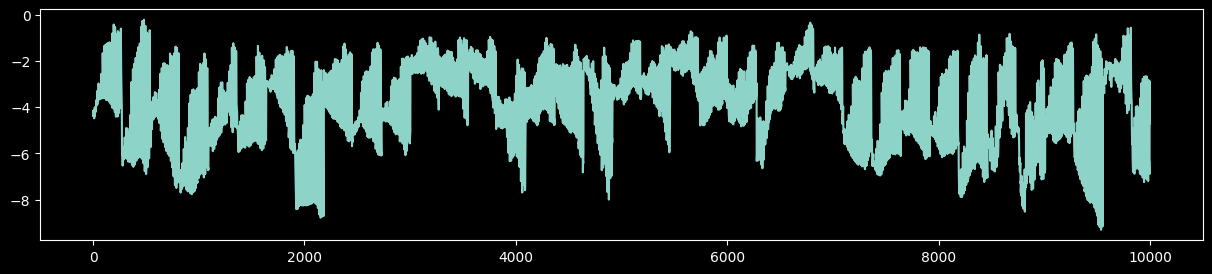

In [ ]:
wind_n.Value[:10000].plot(figsize=(15, 3));

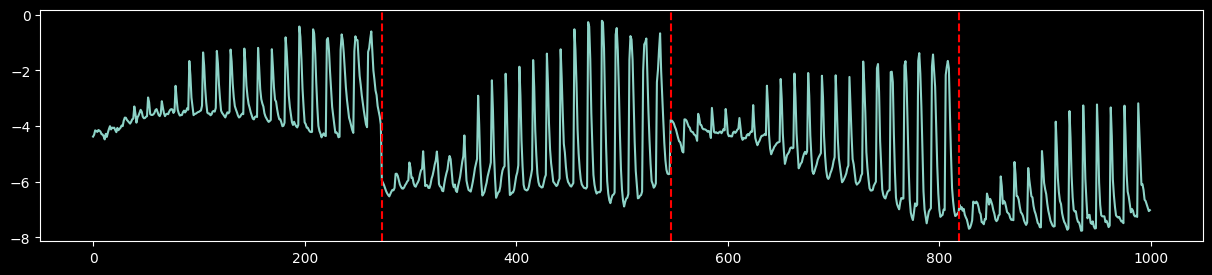

In [ ]:
wind_n.Value[:1000].plot(figsize=(15, 3));
for i in [273, 273*2, 273*3]:
  plt.axvline(i, c='red', ls='--')

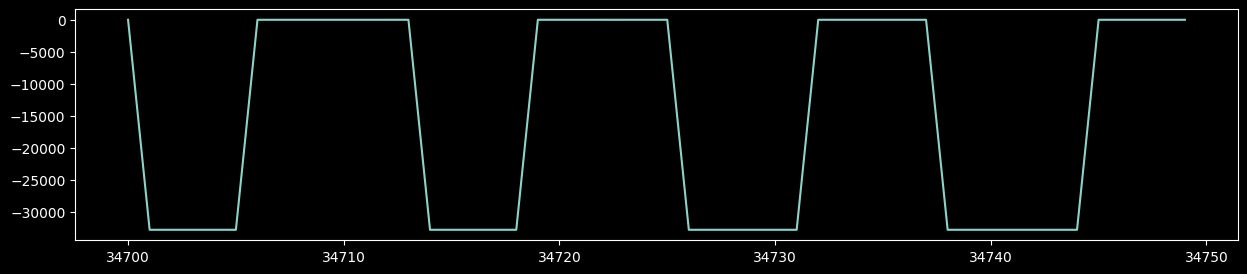

In [ ]:
wind_n.Value[34700:34750].plot(figsize=(15, 3));

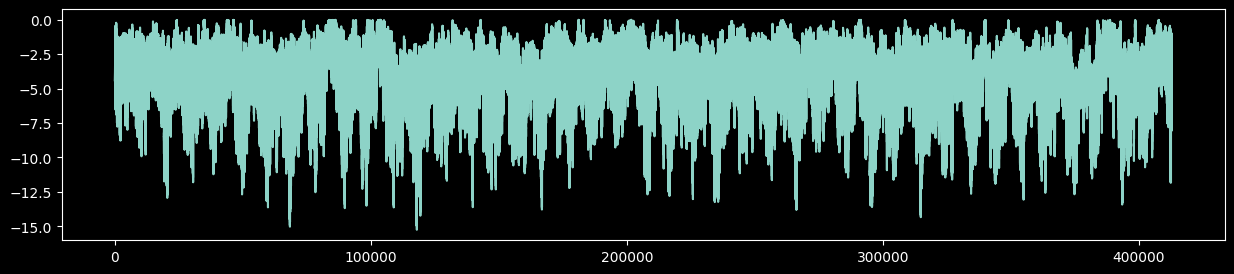

In [ ]:
wind_n.Value[wind_n.Value < -100] = pd.NA
wind_n = wind_n.fillna(method='ffill')
wind_n.Value.plot(figsize=(15, 3));

In [ ]:
wind_n = wind_n.drop('Count', axis=1)
wind_n.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000
mean,1999.500,6.500,2.000,52.500,144.500,-5.141
std,12.121,3.452,0.816,1.514,0.935,2.462
min,1979.000,1.000,1.000,50.000,143.000,-15.254
25%,1989.000,3.750,1.000,51.250,143.750,-6.773
50%,1999.500,6.500,2.000,52.500,144.500,-4.994
75%,2010.000,9.250,3.000,53.750,145.250,-3.267
max,2020.000,12.000,3.000,55.000,146.000,-0.001


# Wind W

In [ ]:
for i in columns:
  wind_w[i] = pd.to_numeric(wind_w[i], errors='coerce')
wind_w = wind_w.fillna(method='ffill')
wind_w.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,412764.000,412764.000,412764.000,412764.000,412764.000,412764.000
mean,2004.743,6.519,2.010,52.504,144.480,-264.360
std,1023.037,5.726,3.817,1.774,2.099,2955.974
min,1.000,-51.278,-59.695,-55.277,-59.660,-32767.000
25%,1989.000,4.000,1.000,51.250,143.750,2.484
50%,2000.000,7.000,2.000,52.500,144.500,4.029
75%,2010.000,10.000,3.000,53.750,145.250,6.078
max,200194.000,1953.210,1952.340,146.000,146.000,15.529


In [ ]:
wind_w.Year[(wind_w.Year < 1979) | (wind_w.Year > 2020)] = pd.NA
wind_w.Month[(wind_w.Month < 1) | (wind_w.Month > 12)] = pd.NA
wind_w.Record[(wind_w.Record < 1) | (wind_w.Record > 3)] = pd.NA
wind_w.Latitude[(wind_w.Latitude < 50) | (wind_w.Latitude > 55)] = pd.NA
wind_w.Longitude[(wind_w.Longitude < 143) | (wind_w.Longitude > 146)] = pd.NA
wind_w.Value[wind_w.Value < -100] = pd.NA
wind_w = wind_w.fillna(method='ffill')
wind_w.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,412764.000,412764.000,412764.000,412764.000,412764.000,412764.000
mean,1999.501,6.500,2.000,52.500,144.500,4.440
std,12.121,3.452,0.817,1.514,0.935,2.592
min,1979.000,1.000,1.000,50.000,143.000,-59.260
25%,1989.000,4.000,1.000,51.250,143.750,2.485
50%,2000.000,7.000,2.000,52.500,144.500,4.030
75%,2010.000,10.000,3.000,53.750,145.250,6.078
max,2020.000,12.000,3.000,55.000,146.000,15.529


# Temperature Sum

In [ ]:
for i in columns:
  tp_sum[i] = pd.to_numeric(tp_sum[i], errors='coerce')
tp_sum = tp_sum.fillna(method='ffill')
tp_sum.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,411779.000,411779.000,411779.000,411779.000,411779.000,411779.000
mean,2255.668,9.567,2.126,52.083,140.766,-10909.544
std,55678.267,1921.411,17.118,113.866,344.457,16426.092
min,0.000,0.000,0.000,-32767.000,-32767.001,-32767.001
25%,1989.000,3.000,1.000,51.250,143.750,-32767.000
50%,1999.000,7.000,2.000,52.500,144.500,146.559
75%,2010.000,10.000,3.000,53.750,145.250,1823.355
max,19829590.000,1232953.250,3952.500,239.000,424.121,4736.898


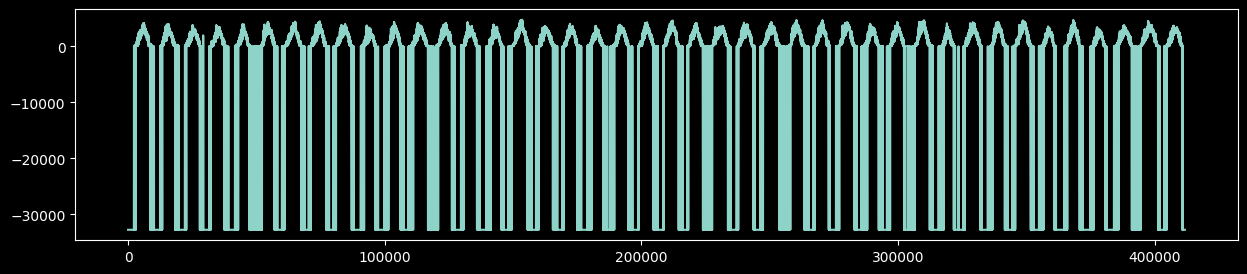

In [ ]:
tp_sum.Value.plot(figsize=(15, 3));

# Final Data

In [ ]:
data = wind_n.merge(wind_w, on=['Year', 'Month', 'Record', 'Latitude', 'Longitude'])
data.describe()

,Year,Month,Record,Latitude,Longitude,Value_x,Value_y
count,412741.000,412741.000,412741.000,412741.000,412741.000,412741.000,412741.000
mean,1999.500,6.501,2.000,52.500,144.500,-5.141,4.441
std,12.121,3.452,0.817,1.514,0.935,2.462,2.581
min,1979.000,1.000,1.000,50.000,143.000,-15.254,-59.260
25%,1989.000,4.000,1.000,51.250,143.750,-6.774,2.485
50%,2000.000,7.000,2.000,52.500,144.500,-4.994,4.030
75%,2010.000,10.000,3.000,53.750,145.250,-3.267,6.078
max,2020.000,12.000,3.000,55.000,146.000,-0.001,15.529


In [19]:
data.to_csv('data.csv', columns=list(data.columns.values)[:-1])

In [20]:
data.to_excel('data.xlsx', columns=list(data.columns.values)[:-1])